z=0.3
z=0.39
z=0.4521
z=0.50439441
z=0.5544137208392481
z=0.6073745738548197
z=0.6689038729653238
z=0.7474323912680101
z=0.8586551795166157
z=1.0372887173107115
z=1.3759678830601012
z=2.1932876152128964
z=5.110510563046274
z=26.417318215007548
z=698.1747016729695
z=487448.2140561399
z=237605761386.8204
z=5.6456497844210635e+22
z=3.18733614883336e+45
z=1.0159111725659876e+91


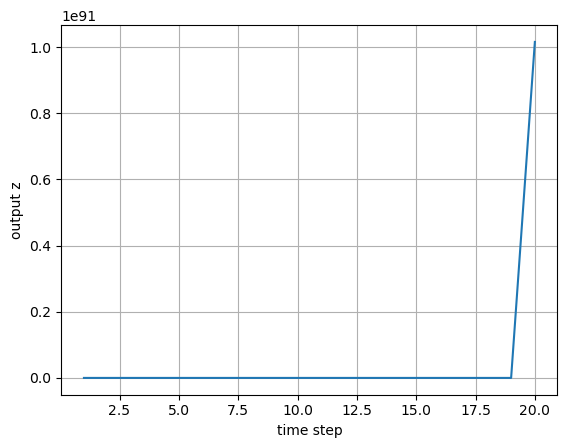

In [186]:
import numpy as np
import matplotlib.pyplot as plt

def fx(z, c):
    return (z ** 2) + c


seed = 0
c = 0.3
z = seed

iterations = 20


x = np.linspace(1, iterations, iterations, dtype=int)
y = np.zeros(iterations)
for i in range(iterations):
    output = fx(z,c)
    z = output
    print(f'{z=}')
    y[i] = z

plt.xlabel('time step')
plt.ylabel('output z')
plt.grid()
plt.plot(x,y)
plt.show()

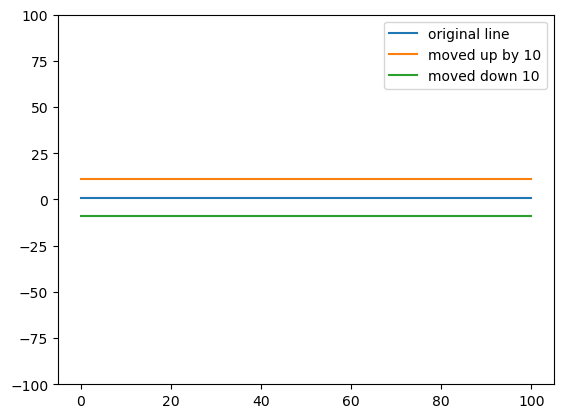

In [187]:
import numpy as np
import matplotlib.pyplot as plt


# Basic iteration (output -> input) and simple transformation

def line(x):
    return x**0

def move_up(x, displacement):
    return x + displacement

def move_down(x, displacement):
    return x - displacement

x = np.linspace(0,100,100)

first_line = line(x)
plt.plot(x, first_line, label='original line')

displacement = 10
moved_up = move_up(first_line, displacement)
moved_down = move_down(first_line, displacement)

plt.plot(x, moved_up, label=f'moved up by {displacement}')
plt.plot(x, moved_down, label=f'moved down {displacement}')

plt.ylim(-100,100)

plt.legend()
plt.show()

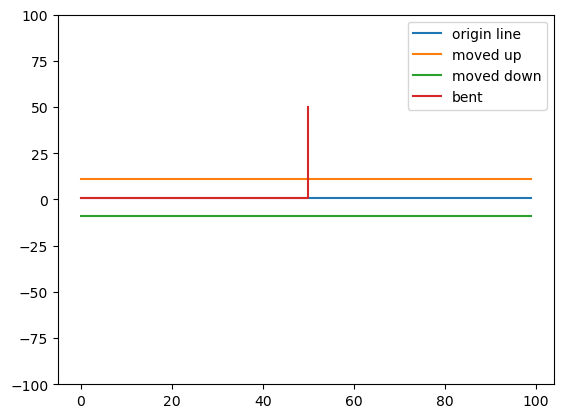

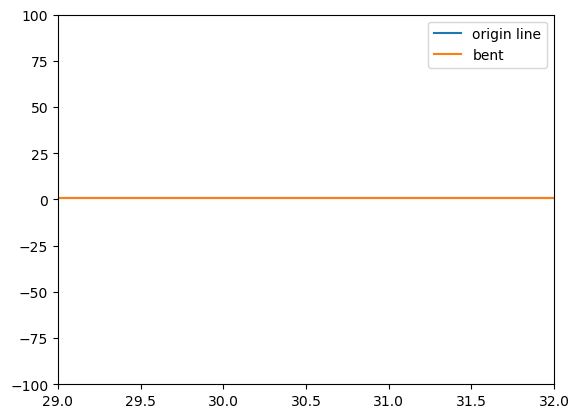

In [188]:
# affine transformation (piecewise linear transformation)
import numpy as np
import matplotlib.pyplot as plt
# simple coordinate manipulation

def bend(coords, bend_point, slope = 1):
    transformed = coords.copy()
    x,y = transformed
    
    x[bend_point:] = x[bend_point]
    y[bend_point:] = y[bend_point] + np.arange(0, len(y[bend_point:])) # starting at the bend point increase y by 1 (adds incrementing numbers due to broadcasting over the range)
    
    return transformed

xx = np.arange(0,100)
yy = np.zeros(100)
xy = np.stack((xx,yy)) # [ [..x..], [..y..] ]

def make_line(coords,y):
    transformed = coords.copy()
    transformed[1, :] = y # t[1,:] means get the 2nd list and all elements in that list
    return transformed

def move_line_up(coords,displacement):
    transformed = coords.copy()
    y = transformed[1]
    transformed[1] = y + displacement
    return transformed

def move_line_down(coords,displacement):
    transformed = coords.copy()
    y = transformed[1]
    transformed[1] = y - displacement
    return transformed

line = make_line(xy,1)
moved_up = move_line_up(line,10)
moved_down = move_line_down(line,10)
bent = bend(line, 50)

plt.plot(line[0], line[1], label='origin line')
plt.plot(moved_up[0],moved_up[1], label='moved up')
plt.plot(moved_down[0],moved_down[1], label='moved down')
plt.plot(bent[0],bent[1], label='bent')

plt.ylim(-100,100)
plt.legend()
plt.show()

# as a piecewise function

def bend_piecewise(coords, bend_point):
    transformed = coords.copy()
    x,y = transformed

    indices = np.arange(len(x))
    # Create an array that increments by 1 starting from the bend point
    increment = np.maximum(0, indices - bend_point + 1)

    piece1 = x             * (indices < bend_point)
    piece2 = x[bend_point] * (indices >= bend_point) # hold x in place x[i]*1 for the Trues
    # y coords
    piece3 = y                * (indices < bend_point)
    piece4 = (y + increment)  * (indices >= bend_point)

    x = piece1+piece2
    y = piece3+piece4

    return np.stack((x,y))

# def break_line(coords, break_point):
#     # TODO: break x or break y, broken goes right or left/up/down with + or - value
#     x,y = transformed = coords.copy()

#     x1 = x[:break_point]
#     x2 = x[break_point:]
#     y1 = y[:break_point]
#     y2 = y[break_point:] + 20

#     # plt.plot(x[:break_point],y1)
#     # plt.plot(x[break_point:],y2)

#     plt.plot(x1, y1, color='blue', label='Broken Line')
#     plt.plot(x2, y2, color='blue', label='')

#     # return np.stack((x,np.concatenate((y1,y2))))

line = make_line(xy,1)
bent = bend_piecewise(line,50)
# broken = move_line_up(break_line(line,30),20)

plt.plot(line[0], line[1], label='origin line')
plt.plot(bent[0],bent[1], label='bent')
# plt.plot(broken[0],broken[1], label='broken')

plt.ylim(-100,100)
plt.xlim(29,32)
plt.legend()
plt.show()
# TODO:  affine transformations: rotation, translation, scaling, reflection/reversal

In [189]:
# playground 

xx = np.linspace(0,100,100)
yy = np.zeros(100)

cs = np.column_stack((xx,yy)) # [ [x,y],[x,y],[x,y],... ]

s = np.stack((xx,yy)) # [[...x...],[...y...]]

# print(cs.shape) # (100,2) - rows (how many lists in the outer list) x cols (ith elements in a list)
# print(cs)
# print(s.shape) # (2,100)
# print(s)

print('\n')
# print(s.T) # transposed - [ [x,y],[x,y], ... ] same as column_stack
# t=s.T
# print(t.T) # transposed again - [ [..x..], [..y..] ] back to original form of np.stack()

s[0,3] = 44
# print(s[0])


xx = np.linspace(1,5,5)
np.zeros(len(xx[xx < 0]))
yy = np.linspace(6,10,5)
# print(xx[xx<0])
print(xx)
p = np.concatenate((xx,yy))
p





[1. 2. 3. 4. 5.]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

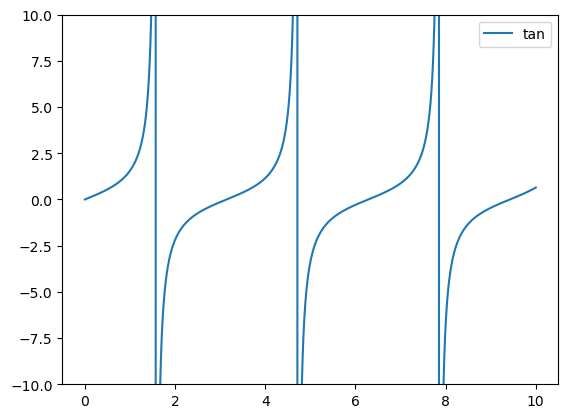

In [190]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(0,10,10001)

tan = np.tan(xx)
cos = np.cos(xx)
sin = np.sin(xx)

# plt.plot(xx,sin,label='sine')
# plt.plot(xx,cos,label='cosine')
plt.plot(xx,tan,label='tan')

# plt.xlim(4.5,5)
plt.ylim(-10,10)

plt.legend()

plt.show()

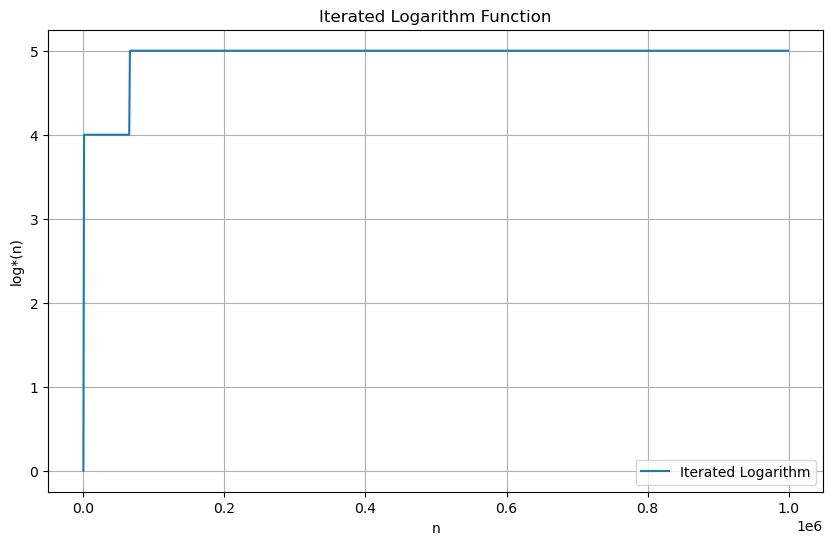

In [191]:
############# ITERATED LOGARITHMS ################

# Show slowly varying and concave properties - found in a lot of places in the real world and very natural

import numpy as np
import math
import matplotlib.pyplot as plt
    

def iterated_logarithm(n, base=2):
    """Calculate the iterated logarithm (log* n) of a number n with a given base."""
    count = 0
    while n > 1:
        n = math.log(n, base)
        count += 1
    return count

# numbers = [1, 2, 4, 16, 65536, 2**65536]
# results = {n: iterated_logarithm(n) for n in numbers}

# list(results.keys())
# list(results.values())

# plt.plot(results.keys(), resutls.values())

# Generate a range of numbers to plot
x = np.arange(1, 1000000, 1000)  # Use a range that provides a clear view of concavity
y = [iterated_logarithm(n) for n in x]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Iterated Logarithm')
plt.xlabel('n')
plt.ylabel('log*(n)')
plt.title('Iterated Logarithm Function')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



# for number, log_star in results.items():
#     print(f"log*({number}) = {log_star}")

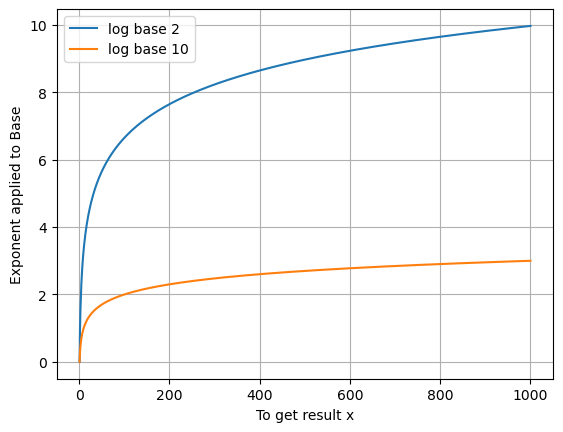

In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Logarithms - the base is the base number you want to know the exponent we need to apply to get the result passed into the log function

start = 1
stop = 1001
step = 1
x = np.arange(start,stop,step)
# print(f'{x=}')


plt.plot(x, np.log2(x), label='log base 2') # smaller base, then the exponent needed will be larger relative to base 10
plt.plot(x, np.log10(x), label='log base 10') # higher base used for the log means the exponent (y) is going to be smaller
plt.ylabel('Exponent applied to Base') # how many times you need to multiply the base by itself to get x
plt.xlabel('To get result x')
plt.legend()
plt.grid()
plt.show()



i=0, n=100000000000, y=36.541209043760986
i=1, n=36.541209043760986, y=5.191452464281917
i=2, n=5.191452464281917, y=2.3761382321968334
i=3, n=2.3761382321968334, y=1.2486187675797162
i=4, n=1.2486187675797162, y=0.3203330557466223


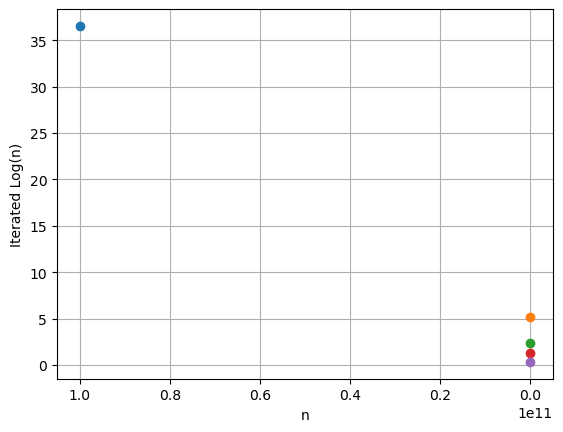

In [193]:
# Iterated Logarithms

import numpy as np
import matplotlib.pyplot as plt

NUM_ITERS = 2

def iterate_log(n, iterations=NUM_ITERS, base=2):
    if base == 2:
        log = np.log2
    elif base == 10:
        log = np.log10
    else:
        # For custom bases
        log = lambda x: np.log(x) / np.log(base)

    i = 0
    while i < iterations and n > 1: # log(less than 1) gives negative results
        y = log(n)
        print(f'{i=}, {n=}, {y=}')
        plt.plot(n,y,'o')

        n = y
        i += 1
    
    return n

n_start = 100000000000
iterate_log(n_start,iterations=10)

plt.ylabel('Iterated Log(n)')
plt.xlabel('n')

plt.grid()
plt.gca().invert_xaxis() # we start at 10 and the output decreases (n on the x-axis, so reverse to show order of operations more intuitively)
plt.show()





i=0, n=100000, y=16.609640474436812
i=1, n=16.609640474436812, y=4.053948940531981
i=2, n=4.053948940531981, y=2.0193279181819226
i=3, n=2.0193279181819226, y=1.0138752085993719
i=4, n=1.0138752085993719, y=0.01988009118335221
5, 5


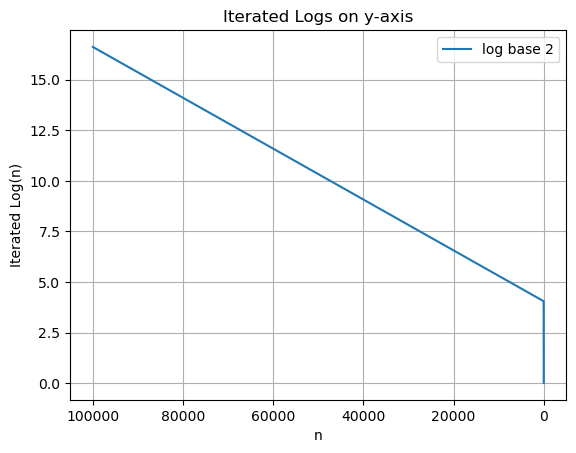

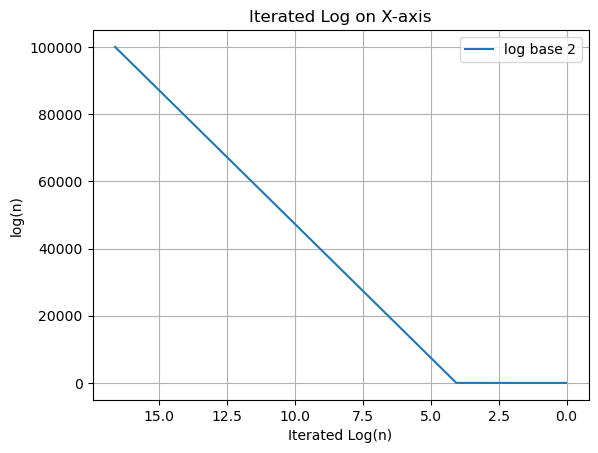

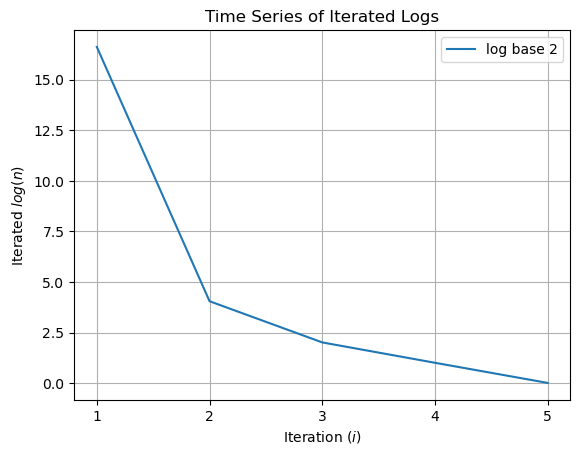

In [194]:
import numpy as np
import matplotlib.pyplot as plt

# collecting x and y values to make on one plot

NUM_ITERS = 10
BASE = 2

def get_log_fn(base):
    if base == 2:
        log = np.log2
    elif base == 10:
        log = np.log10
    else:
        # For custom bases
        log = lambda x: np.log(x) / np.log(base)
    
    return log

def iterate_log(n, iterations=NUM_ITERS, base=BASE):
    log = get_log_fn(base)

    x_values = []
    y_values = []

    i = 0
    while i < iterations and n > 1: # log(less than 1) gives negative results
        y = log(n)
        print(f'{i=}, {n=}, {y=}')

        x_values.append(n)
        y_values.append(y)

        n = y
        i += 1
    
    return (x_values,y_values)

n_start = 100000
x,y = iterate_log(n_start)

print(f'{len(x)}, {len(y)}')

plt.plot(x,y,label=f'log base {BASE}')

plt.ylabel('Iterated Log(n)')
plt.xlabel('n')
plt.legend()
plt.grid()
plt.title('Iterated Logs on y-axis')

plt.gca().invert_xaxis() # we start at 10 and the output decreases (n on the x-axis, so reverse to show order of operations more intuitively)
plt.show()


# switch axis for another perspective
plt.plot(y,x,label=f'log base {BASE}')

plt.xlabel('Iterated Log(n)')
plt.ylabel('log(n)')
plt.legend()
plt.grid()

plt.title('Iterated Log on X-axis')

plt.gca().invert_xaxis() # undo the reverse of x axis
plt.show()

# show time steps perspective (iterations)
ticks = np.arange(1,len(x)+1)
plt.plot(ticks,y,label=f'log base {BASE}')

plt.xticks(ticks)

plt.xlabel('Iteration ($i$)')
plt.ylabel('Iterated $log(n)$')
plt.legend()
plt.grid()

plt.title('Time Series of Iterated Logs')

plt.show()

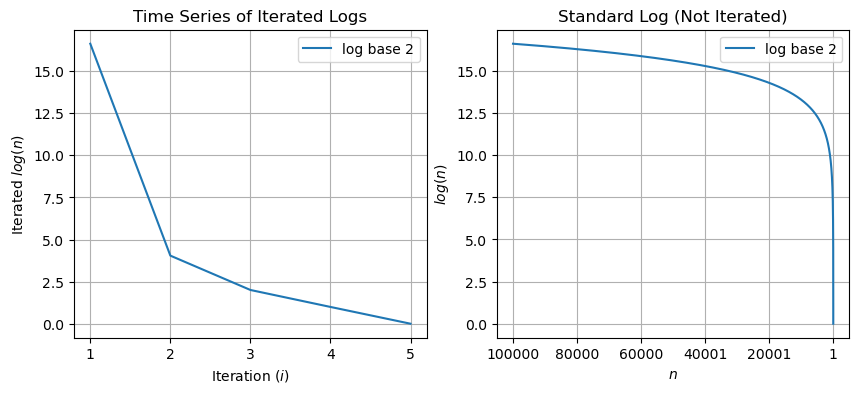

In [198]:
# Comparing Time series of Iterated Logs to Log over a range of numbers

rows=1
cols=2
fig, ax = plt.subplots(rows,cols,figsize=(10, 4))


# Iterated Log Plot
ticks = np.arange(1,len(x)+1)
ax[0].plot(ticks,y,label=f'log base {BASE}')
ax[0].set_xticks(ticks)

ax[0].set_xlabel('Iteration ($i$)')
ax[0].set_ylabel('Iterated $log(n)$')
ax[0].legend()
ax[0].grid()

ax[0].set_title('Time Series of Iterated Logs')

# Standard Log Plot
xx = np.arange(1,n_start)
xx = np.flip(xx) # Match starting of iterations, start at the highest log and go down

log = get_log_fn(BASE)
ax[1].plot(xx,log(xx),label=f'log base {BASE}')

num_ticks = 5+1
xrange = np.linspace(1,n_start,num_ticks)
ax[1].set_xticks(xrange)

ax[1].set_xlabel('$n$')
ax[1].set_ylabel('$log(n)$')
ax[1].legend()
ax[1].grid()

ax[1].set_title('Standard Log (Not Iterated)')

ax[1].invert_xaxis()
plt.show()